# Quantifying the Value of Scaling  
Why Faster TechBio Loops Create More Scientific, Technical, and Commercial Value

In the previous notebooks, we built the three pillars of a TechBio system:

1. **The Flywheel** – the repeating loop that powers progress  
2. **The Data Pipeline** – turning messy lab output into clean, structured data  
3. **The First Model** – converting clean data into a simple predictive signal  
4. **The Learning Loop** – using predictions to guide experiments and improve the system  

Now we shift perspective.

This notebook is not about biology or machine learning.  
It is about **value**.  
Specifically:

> How does scaling the loop increase the scientific, technical, and commercial value of a TechBio platform?

This notebook gives the reader a small simulation they can play with to understand:

- why automation matters  
- why faster loops compound value  
- why better models increase returns  
- why TechBio companies become more valuable as they scale  

The math here is simple on purpose.  
The goal is *intuition*, not finance.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

np.random.seed(42)


---
## 1. Adjustable Inputs (The Levers of Value)

TechBio platforms grow when a few core factors improve:

### ● Scientific variables
- **Assay noise** – how clean the measurements are  
- **Base hit rate** – how often good candidates appear  
- **ML uplift** – how much the model improves hit rate  

### ● Technical variables
- **Cycle time** – how long one loop takes  
- **Batch size** – how many candidates we test each loop  
- **Automation savings** – cost saved per loop from automation  

### ● Commercial variables
- **Cost per experiment**  
- **Value per hit** (scientific or commercial)  
- **Partnership value** – e.g., the value of “useful” datasets  

The reader can modify these numbers to see how scaling changes the shape of the system.


In [2]:
# Adjustable parameters (the reader can modify these)

params = {
    # scientific
    "assay_noise": 0.15,           # lower = cleaner measurements
    "base_hit_rate": 0.10,         # percent of random candidates that are "good"
    "ml_uplift": 0.25,             # model improves hit rate by +25%

    # technical
    "cycle_time_days": 14,         # time per loop
    "batch_size": 50,              # candidates tested per loop
    "automation_savings_per_loop": 2000,  # cost saved with automation

    # commercial
    "cost_per_experiment": 50,     # per candidate
    "value_per_hit": 3000,         # scientific/commercial value of discovering a hit
    "partnership_value_per_cycle": 5000
}

params


{'assay_noise': 0.15,
 'base_hit_rate': 0.1,
 'ml_uplift': 0.25,
 'cycle_time_days': 14,
 'batch_size': 50,
 'automation_savings_per_loop': 2000,
 'cost_per_experiment': 50,
 'value_per_hit': 3000,
 'partnership_value_per_cycle': 5000}

---

## 2. A Simple Model of TechBio “Value”

We break down value into three parts:

### ● Scientific Value  
How much useful signal we extract:
- more hits  
- cleaner data  
- stronger predictions  

### ● Technical Value  
How efficiently we run the loop:
- reducing cycle time  
- increasing batch size  
- saving money through automation  

### ● Commercial Value  
How compelling the platform is to partners and investors:
- useful data per cycle  
- cost per discovery  
- value of a dataset  

Our simulation computes value per cycle and cumulative value across time.


In [3]:
def simulate_value(params, n_cycles=12):
    """
    Simulates scientific, technical, and commercial value across multiple cycles.
    Returns a DataFrame with value components.
    """
    
    # Unpack parameters
    noise = params["assay_noise"]
    base_hit = params["base_hit_rate"]
    uplift = params["ml_uplift"]
    batch = params["batch_size"]
    cost_exp = params["cost_per_experiment"]
    value_hit = params["value_per_hit"]
    auto_save = params["automation_savings_per_loop"]
    partner_value = params["partnership_value_per_cycle"]
    
    # Model-guided hit rate
    guided_hit_rate = base_hit * (1 + uplift)
    
    # Scientific value = number of hits * value_per_hit
    scientific_values = []
    technical_values = []
    commercial_values = []
    
    for cycle in range(n_cycles):
        # Hits discovered
        hits = guided_hit_rate * batch
        
        # noise reduces scientific value
        noise_penalty = 1 - noise
        
        scientific_value = hits * value_hit * noise_penalty
        
        # technical value: automation savings
        technical_value = auto_save
        
        # commercial value: partnership + usable dataset value
        commercial_value = partner_value
        
        scientific_values.append(scientific_value)
        technical_values.append(technical_value)
        commercial_values.append(commercial_value)
    
    df = pd.DataFrame({
        "Cycle": range(1, n_cycles + 1),
        "Scientific_Value": scientific_values,
        "Technical_Value": technical_values,
        "Commercial_Value": commercial_values
    })
    
    return df


In [4]:
value_df = simulate_value(params, n_cycles=12)
value_df.head()


,Cycle,Scientific_Value,Technical_Value,Commercial_Value
0,1,15937.5,2000,5000
1,2,15937.5,2000,5000
2,3,15937.5,2000,5000
3,4,15937.5,2000,5000
4,5,15937.5,2000,5000


---

## 3. Visualizing the Value of Scaling

We now plot:

### ● Value per cycle  
How much value each loop produces.

### ● Cumulative value  
How value compounds as the system runs multiple cycles.

These simple charts show why TechBio companies become more valuable as they scale the loop.


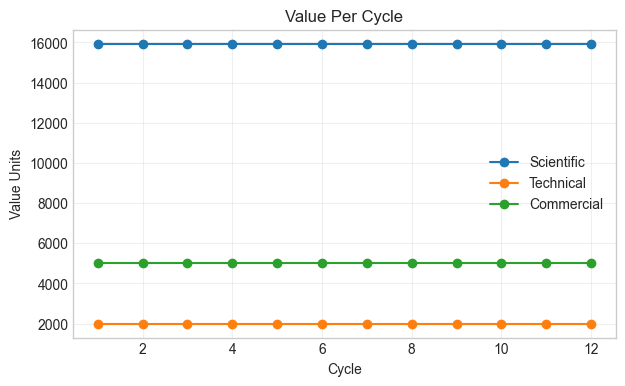

In [5]:
plt.figure(figsize=(7,4))
plt.plot(value_df["Cycle"], value_df["Scientific_Value"], marker="o", label="Scientific")
plt.plot(value_df["Cycle"], value_df["Technical_Value"], marker="o", label="Technical")
plt.plot(value_df["Cycle"], value_df["Commercial_Value"], marker="o", label="Commercial")

plt.title("Value Per Cycle")
plt.xlabel("Cycle")
plt.ylabel("Value Units")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


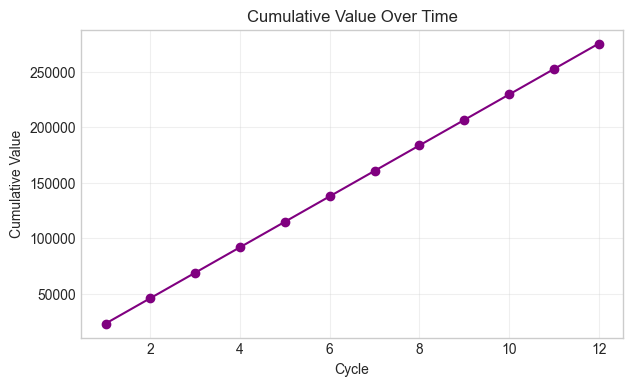

In [6]:
value_df["Total_Value"] = (
    value_df["Scientific_Value"]
    + value_df["Technical_Value"]
    + value_df["Commercial_Value"]
)

value_df["Cumulative_Value"] = value_df["Total_Value"].cumsum()

plt.figure(figsize=(7,4))
plt.plot(value_df["Cycle"], value_df["Cumulative_Value"], marker="o", color="purple")
plt.title("Cumulative Value Over Time")
plt.xlabel("Cycle")
plt.ylabel("Cumulative Value")
plt.grid(True, alpha=0.3)
plt.show()


---

## 4. Final Takeaway

Scaling is not a buzzword.  
It is the core engine of every serious TechBio platform.

In this simple notebook, each cycle produces the **same** amount of value.  
That is why the “value per cycle” plot is a flat line.  
Nothing changes from one cycle to the next because we kept all parameters constant on purpose.

But the cumulative value plot rises steadily.  
This is exactly how a TechBio loop works:

- each cycle adds new data  
- each cycle adds new discoveries  
- each cycle adds new technical improvements  
- each cycle adds new commercial value  

Even a stable loop produces **compounding value over time**.

This is the point:

> A TechBio platform becomes more valuable not because one cycle is magical,  
> but because the loop keeps running.

And when you improve the loop — making the assay cleaner, the model stronger, the automation faster — the slope of that cumulative value curve climbs even more.

In real TechBio systems:

- better models increase the hit rate  
- automation reduces cost and speeds up cycles  
- cleaner assays make data more useful  
- larger batches accelerate learning  
- each improvement multiplies the effect of the next  

This is the compounding force behind TechBio, the same idea that makes interest grow in a bank account.

### The key idea is beautifully simple:

**Faster loops create more data.  
More data creates better models.  
Better models guide better experiments.  
Better experiments create more value.**

This cycle is how a TechBio concept becomes a TechBio company.

Scaling the loop is the difference between a cool research project  
and a platform that keeps getting smarter, cheaper, faster, and more valuable.
